## Решение задачи бинарной классификации

### Логистическая регрессия

y = {-1, +1}

$b(x) = \sigma(<w,x>)$, где $\sigma(z) = \frac{1}{1 + e^{-z}}$

Логистическая регрессия - это линейный классификатор, который кроме классов умеет предсказывать вероятности классов, а именно, $b(x) = P(y = +1 | x)$

Но об этом на след паре

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
data = pd.read_csv('bike_buyers_clean.csv')

In [4]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
[['Marital Status', 'Gender', 'Home Owner', 'Purchased Bike']]

# Обзор данных

Проверьте типы колонок в датасете

In [7]:
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

Колонки с бинарными качественными признаками (типа пола) замените на чиселки

In [11]:
data['Region'].unique()

array(['Europe', 'Pacific', 'North America'], dtype=object)

In [ ]:
[['Marital Status', 'Gender', 'Home Owner', 'Purchased Bike']]

In [12]:
data['Marital Status'] = (data['Marital Status'] == 'Married').astype(int)
data['Gender'] = (data['Gender'] == 'Female').astype(int)
data['Home Owner'] = (data['Home Owner'] == 'Yes').astype(int)
data['Purchased Bike'] = (data['Purchased Bike'] == 'Yes').astype(int)

In [13]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,1,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,0,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,0,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,0,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,0,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1


In [17]:
data.Education.unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

Оставим в данных только числовые колонки.

In [20]:
data.drop(['ID', 'Education', 'Occupation', 'Commute Distance', 'Region'], axis=1, inplace=True)
data.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Age,Purchased Bike
0,1,1,40000,1,1,0,42,0
1,1,0,30000,3,1,1,43,0
2,1,0,80000,5,0,2,60,0
3,0,0,70000,0,1,1,41,1
4,0,0,30000,0,0,0,36,1


Поделите данные на матрицу объект-признак и ответ

In [22]:
X = data.drop(['Purchased Bike'], axis=1)
y = data['Purchased Bike']

Проверим сбалансированность классов. Если классы не сбалансированны, мы не можем использовать accuracy

In [25]:
y.value_counts()

0    519
1    481
Name: Purchased Bike, dtype: int64

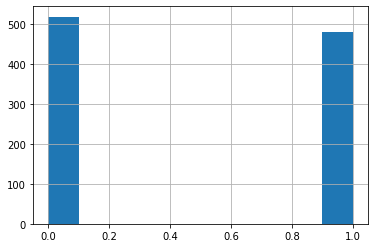

In [28]:
y.hist()

## Масштабирование числовых признаков

In [ ]:
data['Income']

In [ ]:
# Очень большие значения, а у нас есть Пол со значниями 0 и 1...
# Надо масштабировать!

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(data[['Income']])

array([[-0.51953796],
       [-0.8414326 ],
       [ 0.76804062],
       [ 0.44614598],
       [-0.8414326 ],
       [-1.48522189],
       [ 3.34319779],
       [-0.51953796],
       [-1.16332725],
       [-1.16332725],
       [-0.8414326 ],
       [ 1.08993527],
       [ 3.66509243],
       [-0.51953796],
       [ 0.12425133],
       [-1.48522189],
       [-0.8414326 ],
       [-0.8414326 ],
       [-0.51953796],
       [-1.16332725],
       [-0.51953796],
       [ 0.76804062],
       [-0.51953796],
       [ 0.76804062],
       [-0.51953796],
       [-0.8414326 ],
       [-0.8414326 ],
       [ 1.41182991],
       [ 0.44614598],
       [-1.16332725],
       [-1.16332725],
       [-1.48522189],
       [-1.16332725],
       [ 0.76804062],
       [ 1.08993527],
       [-1.48522189],
       [-1.48522189],
       [-0.8414326 ],
       [-1.16332725],
       [-1.48522189],
       [-0.8414326 ],
       [-0.51953796],
       [-1.48522189],
       [ 3.66509243],
       [-1.16332725],
       [-1

Важные замечания:
- классы sklearn возвращают numpy arrays, а не pandas dataframe, что неудобно
- любое преобразование признаков в ML-задачах нужно обучать только на тренировочных данных

In [31]:
# пример работы с пайплайном
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train) # алгоритм находит параметры: mean и sigma. Только к обучающим данным!

X_train_sc = scaler.transform(X_train) # нормирует: x->(x-mean)/sigma
X_test_sc = scaler.transform(X_test) # с помощью mean и sigma от тренировочных данных изменяем test data

In [32]:
X_train_sc

array([[ 0.91801516, -0.95564915,  0.7570582 , ...,  0.67760163,
         0.46479435,  0.77278406],
       [-1.08930662,  1.04640913, -0.53118604, ...,  0.67760163,
        -0.41772656, -1.2433268 ],
       [-1.08930662, -0.95564915,  0.11293608, ...,  0.67760163,
         1.34731526, -0.27909987],
       ...,
       [ 0.91801516, -0.95564915,  3.65560774, ...,  0.67760163,
         2.22983617,  0.94809804],
       [ 0.91801516, -0.95564915, -0.8532471 , ..., -1.47579338,
         0.46479435, -1.41864079],
       [ 0.91801516,  1.04640913,  0.7570582 , ...,  0.67760163,
         0.46479435,  1.47404001]])

In [33]:
X_train = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

X_train.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Age
382,0.918015,-0.955649,0.757058,1.260854,0.677602,0.464794,0.772784
953,-1.089307,1.046409,-0.531186,0.648393,0.677602,-0.417727,-1.243327
63,-1.089307,-0.955649,0.112936,1.260854,0.677602,1.347315,-0.279100
437,-1.089307,1.046409,-0.853247,0.648393,0.677602,0.464794,-1.418641
188,0.918015,1.046409,0.434997,-1.188992,0.677602,2.229836,-1.068013


In [34]:
y_train.value_counts()

0    392
1    358
Name: Purchased Bike, dtype: int64

Обучим логистическую регрессию и посмотрим на качество модели.

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.596

# Соберем сделанные преобразования данных в pipeline

In [37]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', LogisticRegression())
    ])

In [38]:
# пример работы с пайплайном

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.596


## Интерпретация результатов

In [39]:
model.coef_, model.intercept_

(array([[-0.21773585, -0.02284264,  0.4358884 , -0.12593296,  0.03888016,
         -0.62244298, -0.06467396]]),
 array([-0.09777169]))

In [ ]:
pipe['model_'].coef_, pipe['model_'].intercept_

In [ ]:
coefs = pd.DataFrame(model.coef_, index=np.arange(len(model.coef_)), columns=X_train.columns)
coefs['Intercept'] = model.intercept_
coefs

$$ y = \sigma(0.38*Income - 0.16*Children - 0.53*Cars - 0.1*Age - 0.07) $$

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X, y, cv=3).mean()

0.6069872267477058